<a href="https://colab.research.google.com/github/adarshm11/earthquakes-analysis/blob/main/CS_131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap


### Extract zip dataset

In [ ]:
file_path = '/content/drive/MyDrive/kaggle/global_earthquakes_data.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [ ]:
import unittest
import os

class TestDataFrame(unittest.TestCase):

    def setUp(self):
        self.file_path = '/content/drive/MyDrive/kaggle/earthquakes.csv'
        try:
            self.df = pd.read_csv(self.file_path)
        except FileNotFoundError:
            self.fail(f"File not found: {self.file_path}.  Make sure the file exists and the path is correct.")


    def test_no_empty_cells(self):
        columns_to_check = ['magnitude', 'date', 'time', 'felt', 'tsunami', 'latitude', 'longitude', 'location']
        for col in columns_to_check:
            self.assertFalse(self.df[col].isnull().values.any(), f"Column '{col}' contains empty cells.")


    def test_file_exists(self):
      self.assertTrue(os.path.exists(self.file_path), f"File not found: {self.file_path}")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.076s

OK


# Visualizing the top 20 magnitude Earthquakes


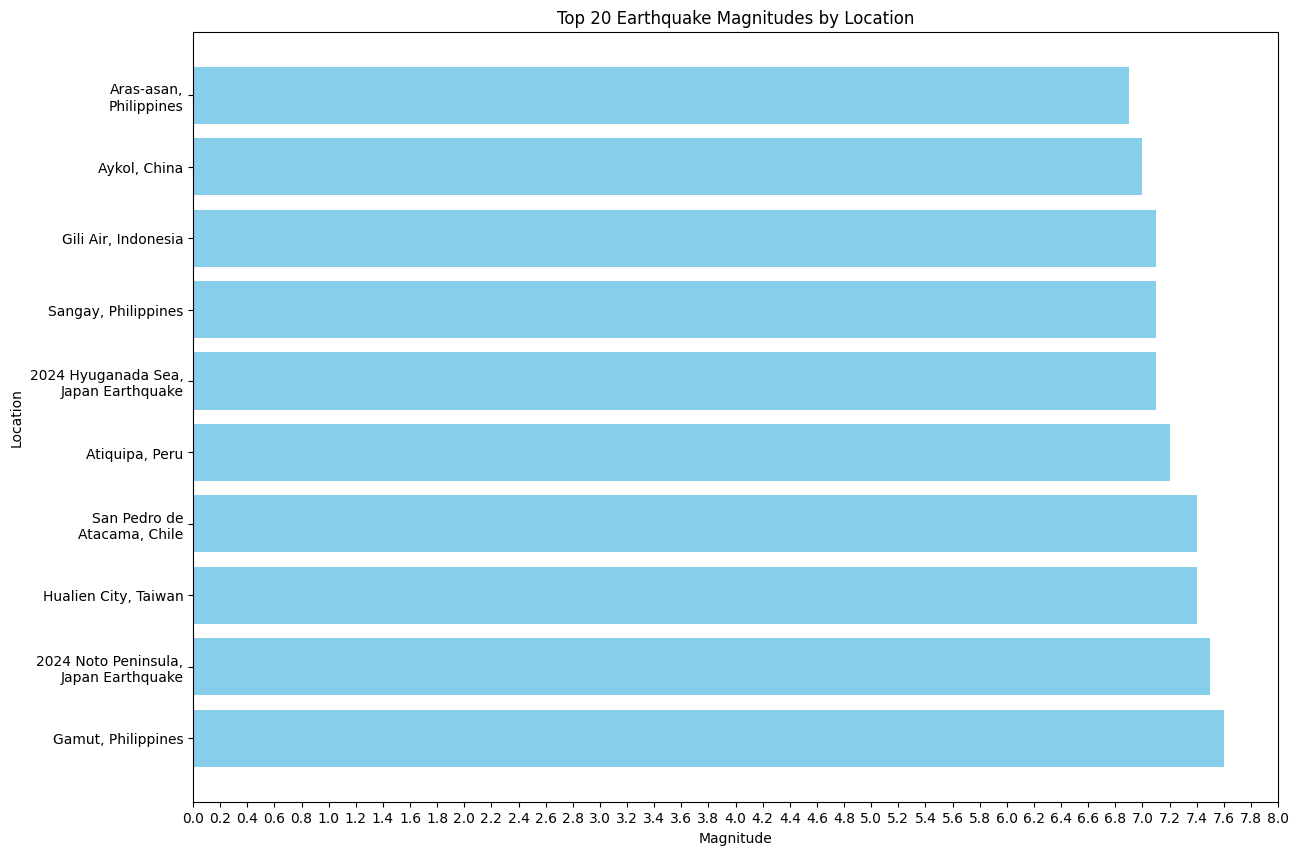

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/earthquakes.csv')
top_20 = df.nlargest(20, 'magnitude')

# Extract 'location' and 'magnitude' columns
locations = top_20['location']
magnitudes = top_20['magnitude']

# Function to wrap long location names
def wrap_labels(labels, width=20):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrap the location labels if they are long
wrapped_locations = wrap_labels(locations)

# Create the figure with more height to prevent clustering
plt.figure(figsize=(14, 10))

# Create a horizontal bar plot
plt.barh(wrapped_locations, magnitudes, color='skyblue')

plt.xlabel('Magnitude')
plt.ylabel('Location')
plt.title('Top 20 Earthquake Magnitudes by Location')

plt.xticks(np.arange(0, 8.2, 0.2))

# Show the plot
plt.show()



ValueError: x and y must be the same size

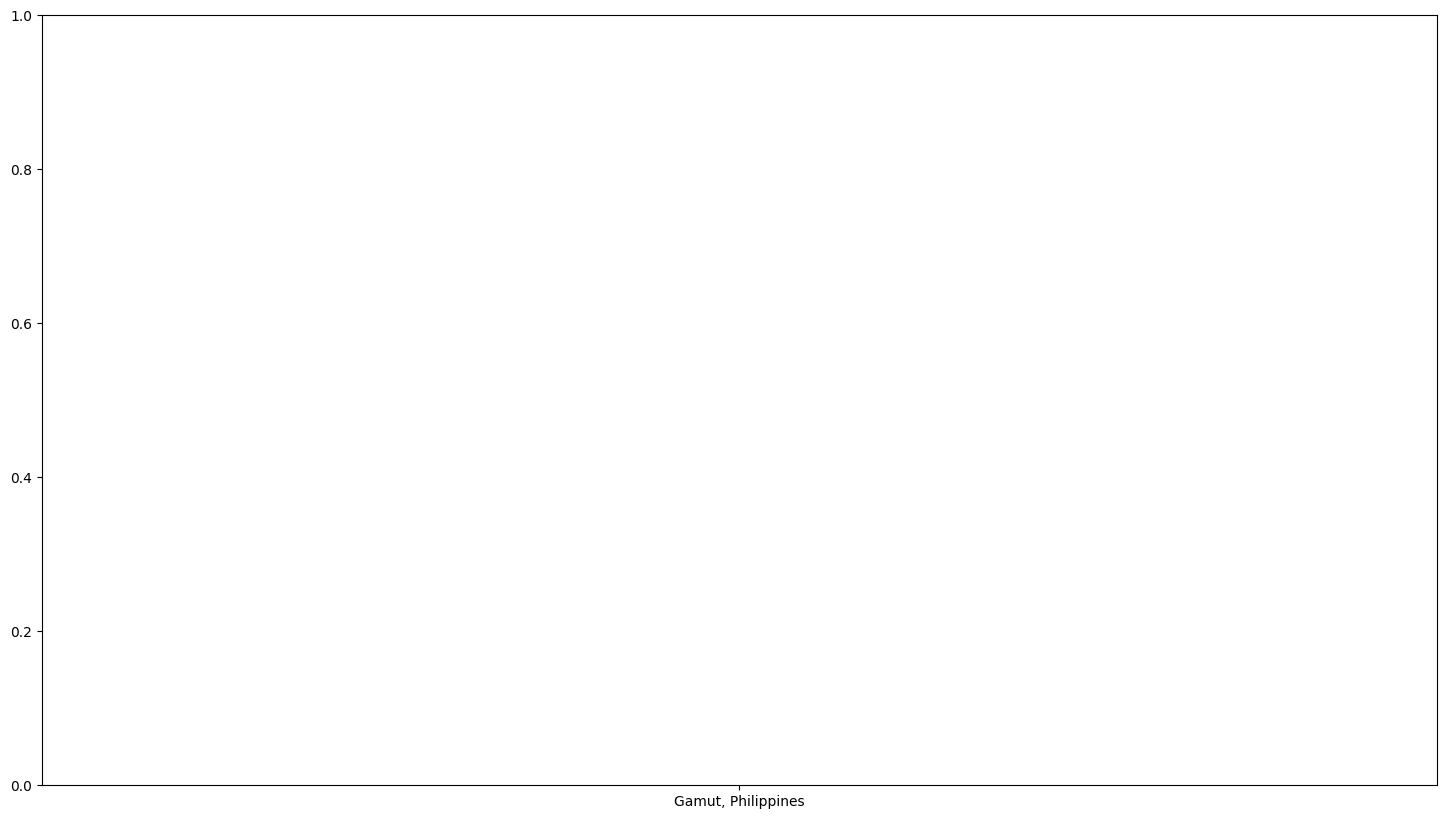

In [ ]:
tsunami_earthquakes = df[df['tsunami'] > 0]

# Extract relevant columns for visualization
location = tsunami_earthquakes['location']
magnitude = tsunami_earthquakes['magnitude']

wrapped_locations = wrap_labels(locations)

# Create the figure
plt.figure(figsize=(18, 10))

# Scatter plot for earthquake locations
plt.scatter(wrapped_locations, magnitude, c='red', alpha=0.7, edgecolor='k', s=50)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations with Tsunami > 1')
plt.grid(True)

# Show the plot
plt.show()